# Bitcoin To US Dollar Spot Price Exploration Using Numpy

* Student Name: Michael Rideout
* Student Number: 225065259
* E-mail: s225065259@deakin.edu.au
* Student Course Code: SIT731
---

## Introduction

Bitcoin is the world's first decentralised cryptocurrency, which is a peer-to-peer network in which participating nodes verify transactions through cryptographic means. The verified transactions are then recorded in a distributed ledger known as a blockchain [1].

Numpy is a python library that enables manipulation of large, multi-dimensional arrays and matrices. It has a rich collection collection of mathematical functions which operate on these arrays [2].

This investigation will be use Numpy to explore BTCUSD spot price data in Q3 2023. BTCUSD is the foreign exchange currrency pair for Bitcon and the US Dollar.


In [1]:
# Import libraries here
import numpy as np
import matplotlib.pyplot as plt

## Descriptive Statistics for the Time Series

Here we will load the BTCUSD data from a csv file and use statistical descriptive measures to give an overview of the price data.

The BTCUSD csv dataset contains the following columns: Date,Open,High,Low,Close,Adj Close,Volume
We will use only maintain two arrays, one being the Date column's data (to verify correct dates are used when querying for Q3 data) and the other, the Close fields will be the spot data.

In [2]:
# Read the csv file BTC-USD.csv into a numpy array. The file is assumed to be located in the current directory
spot_data = np.genfromtxt('BTC-USD.csv', delimiter=',', skip_header=1, usecols=(4), dtype=float)
date_data = np.genfromtxt('BTC-USD.csv', delimiter=',', skip_header=1, usecols=(0), dtype=str)

# Assert that we have correct size arrays for both spot_data and date_data
assert len(spot_data) == len(date_data)
assert 365 == len(spot_data)  # check we have a full year worth of data

# Filter dates for Q3
q3_start_index = 181
q3_end_index = 273
q3_dates = date_data[q3_start_index:q3_end_index]
assert q3_dates[0] == '2023-07-01'
assert q3_dates[-1] == '2023-09-30'

# Fitler spot data for Q3
q3_spot_data = spot_data[q3_start_index:q3_end_index]

# Calculate statistical descriptors
arthimetic_mean = np.mean(q3_spot_data)
minimum = np.min(q3_spot_data)
first_quartile = np.percentile(q3_spot_data, 25)
median = np.median(q3_spot_data)
third_quartile = np.percentile(q3_spot_data, 75)
maximum = np.max(q3_spot_data)
standard_deviation = np.std(q3_spot_data)
interquartile_range = third_quartile - first_quartile

# Print results
label_length = 20
print(f"{'Arithmetic Mean:':<{label_length}} {arthimetic_mean:.2f}")
print(f"{'Minimum:':<{label_length}} {minimum:.2f}")
print(f"{'First Quartile:':<{label_length}} {first_quartile:.2f}")
print(f"{'Median:':<{label_length}} {median:.2f}")
print(f"{'Third Quartile:':<{label_length}} {third_quartile:.2f}")
print(f"{'Maximum:':<{label_length}} {maximum:.2f}")
print(f"{'Standard Deviation:':<{label_length}} {standard_deviation:.2f}")
print(f"{'Interquartile Range:':<{label_length}} {interquartile_range:.2f}")


Arithmetic Mean:     28091.33
Minimum:             25162.65
First Quartile:      26225.56
Median:              28871.82
Third Quartile:      29767.07
Maximum:             31476.05
Standard Deviation:  1827.04
Interquartile Range: 3541.51


From the above descriptive statistics we can deduce the following details about price flucations for Q3 2023:
* The difference between the minimum and maximum price over the period was $6313.40 indicating high price variability.
* With the first quartile being 26225.56, the third quartile being 29767.07 this tells us that 50% of values fell between 26225.56 and 29767.07. As the mean is 28871.82 the middle 50% of prices did not stray far from the median of 28871.82.
* The standard deviation of 1827.04 show a high daily price variability relative to the mean of 6.5%

## Graph of Spot Price
A line graph is useful to visualise daily spot price variations. 

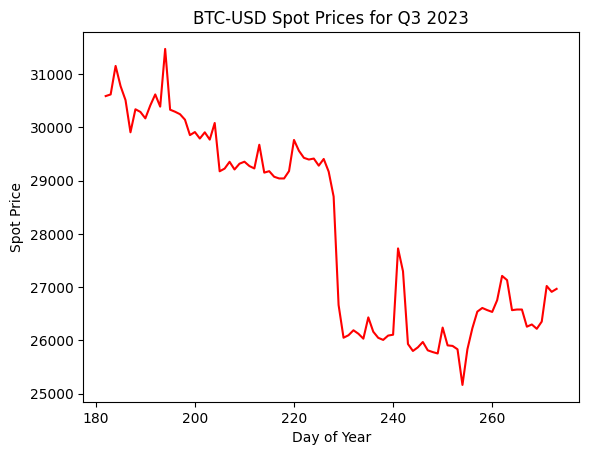

In [3]:
# Plot a line graph for Q3 spot data
start_index_q3 = 182
plt.plot(range(start_index_q3, start_index_q3+len(q3_spot_data)), q3_spot_data, color='red')
plt.xlabel('Day of Year')
plt.ylabel('Spot Price')
plt.title('BTC-USD Spot Prices for Q3 2023')
plt.show()

This line graph allows us to easily deduce some trends not evident from descriptive statistics, those being:
* There was a downward trend in price for the whole Q3 period
* There was a steady downward trend from the start to the middle of the Q3 period. There was a large gap down on day 228 to 229.
* After the large gap down, the trend changed to that of a consolidation phase.

Now determine the dates for the highest and lowest prices for Q3 2023

In [4]:
# Find the days that had the lowest and highest spot prices
lowest_price = np.min(q3_spot_data)
lowest_price_index = np.argmin(q3_spot_data)
highest_price = np.max(q3_spot_data)
highest_price_index = np.argmax(q3_spot_data)

print(f"Lowest  price was on day {lowest_price_index + start_index_q3} ({lowest_price:.2f}) ({q3_dates[lowest_price_index]})")
print(f"Highest price was on day {highest_price_index + start_index_q3} ({highest_price:.2f}) ({q3_dates[highest_price_index]})")


Lowest  price was on day 254 (25162.65) (2023-09-11)
Highest price was on day 194 (31476.05) (2023-07-13)


The fact that the date of the highest price (2023-07-13) was closer to the start of the Q3 period and that the date of the lowest price (2023-09-11) was towards the end of the Q3 period is further confirmation that the price action was in a downward trend.

## Daily Price Change Exploration

A box plot allows for the graphical demonstration of locality, spread and skewness of data through their quartiles [3]. Below is a box plot of the daily spot price changes for Q3 2023.

Arithmetic mean of price changes: -39.80


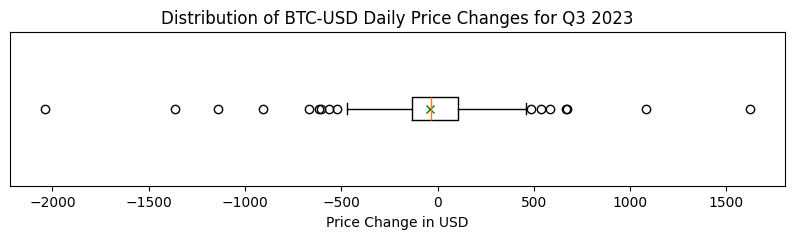

In [5]:
# We need to caclulate the daily price changes. Numpy has the function diff() that does this for us.
daily_price_changes = np.diff(q3_spot_data)

# Display a horizontal box-and-whisker plot of the daily price changes
plt.subplots(figsize=(10, 2))
plt.boxplot(daily_price_changes, vert=False, )
plt.xlabel('Price Change in USD')
plt.yticks([]) # Dont display the y-ticks
plt.title('Distribution of BTC-USD Daily Price Changes for Q3 2023')

# We need to mark the arithmetic mean on the plot
mean_price_change = np.mean(daily_price_changes)
plt.plot(mean_price_change, 1, 'gx', label='Arithmetic Mean')
print (f"Arithmetic mean of price changes: {mean_price_change:.2f}")

# Display the plot
plt.show()



The boxplot displays the dataset utilising five summaries. Those summaries being:
1. Minimum - The lowest datapoint excluding outliers
2. Maximum - The highest datapoint excluding outliers
3. Median - The middle value
4. First Quartile - The median of the lower half of the dataset
5. Third Quartile - The median of the upper half of the dataset
[3].
A box plot also displays outliers, which we can see that outliers exist in both the lower and higher ends of the price change spectrum.
The arthimetic mean of the price changes (displayed as the green x on the box plot) has a value of -$39.80. Although the daily price change mean is realtively small, it can be seen from the large standard deviation that BTCUSD has high volatility for the period.



As can be seen from the box plot above, outliers exist (dots beyond the whisker ends). A common method to determine the boundaries of the whiskers is to set the ends as being 1.5 multiplied by the interquartile range [3]. The two whisker boundaries are therefore defined as:
1. Minimum whisker boundary = Quartile 1 - (1.5 * Interquartile Range)
2. Maximum whisker boundary = Quartile 3 + (1.5 * interqartile Range) [3]
Based on this definition we will calculate these boundaries and count the number of outliers that fall outside these bounds

In [6]:
# Calculate the quantiles of the daily price changes
quartile_1 = np.percentile(daily_price_changes, 25)
quartile_3 = np.percentile(daily_price_changes, 75)

# Calculate the interquartile range
iqr = quartile_3 - quartile_1

# Calculate whisker boundaries
lower_bound = quartile_1 - 1.5 * iqr
upper_bound = quartile_3 + 1.5 * iqr

lower_outliers = daily_price_changes[daily_price_changes < lower_bound]
upper_outliers = daily_price_changes[daily_price_changes > upper_bound]

print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
print(f"Lower outlier count: {len(lower_outliers)}")
print(f"Upper outlier count: {len(upper_outliers)}")
print("-----------------------")
print(f"There are {len(lower_outliers) + len(upper_outliers)} outliers.")



Lower bound: -494.48
Upper bound: 464.15
Lower outlier count: 9
Upper outlier count: 7
-----------------------
There are 16 outliers.


From the outlier calculations, we were able to determine that there was a total of 16 outliers. 9 outliers below the minimum whisker boundary of -$494.48 and 7 outliers above the maximum whisker boundary of $464.15. It can also be seen by visual inspection of the box plot that many outliers were close to both the upper and lower whisker boundaries but that the lowest outlier was less that -$2000 and that the highest outlier was more than $1500.

## Conclusion

This investigation utilised the python Numpy library to manipulate BTCUSD foreign exchange currency spot data for the third quarter of 2023. Descriptive statistics as well as a box plot provided a means to characterise trends in the spot price data. Possible extensions to this work might include extending the number of periods being investigate and by comparing quarterly changes year on year to try and detect seasonal patterns

## Reference

1. Wikipedia contributors. (2024, October 31). Bitcoin. In Wikipedia, The Free Encyclopedia. Retrieved 08:05, November 7, 2024, from https://en.wikipedia.org/w/index.php?title=Bitcoin&oldid=1254525564
2. Wikipedia contributors. (2024, October 24). NumPy. In Wikipedia, The Free Encyclopedia. Retrieved 08:06, November 7, 2024, from https://en.wikipedia.org/w/index.php?title=NumPy&oldid=1253026816
3. Wikipedia contributors. (2024, June 28). Box plot. In Wikipedia, The Free Encyclopedia. Retrieved 03:45, November 8, 2024, from https://en.wikipedia.org/w/index.php?title=Box_plot&oldid=1231456143